In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# load the data 
titanic_data = pd.read_csv('./titanic_train.csv')
test_data = pd.read_csv('./titanic_test.csv')

In [24]:
# Drop irrelevant columns
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
test_data = test_data.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)

In [25]:
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [26]:
# Convert categorical columns using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

In [30]:
# 'Survived'를 문자열로 변환
titanic_data['Survived'] = titanic_data['Survived'].astype(str)

In [31]:
# 'Embarked' 열의 문자열을 숫자로 변환
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [9]:
# 'Name', 'Ticket', 'PassengerId' 열 제거
titanic_data = titanic_data.drop(columns=['Name', 'Ticket', 'PassengerId'], axis=1)

In [10]:
# 독립 변수(X)와 종속 변수(Y) 설정
X = titanic_data.drop(columns=['Survived'], axis=1)
Y = titanic_data['Survived']

In [11]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
# 로지스틱 회귀 모델 초기화 및 학습
model = LogisticRegression()
model.fit(X_train, Y_train)


c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# 학습 데이터 정확도 출력
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data: ', training_data_accuracy)

Accuracy score of training data:  0.8075842696629213


In [14]:
# 테스트 데이터 정확도 출력
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data: ', test_data_accuracy)

Accuracy score of test data:  0.7821229050279329


In [15]:
# 그래프 그리기
sns.set(style="whitegrid", palette="pastel")

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9288\2351236859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=titanic_data, palette="Set2")


Text(0, 0.5, 'Count')

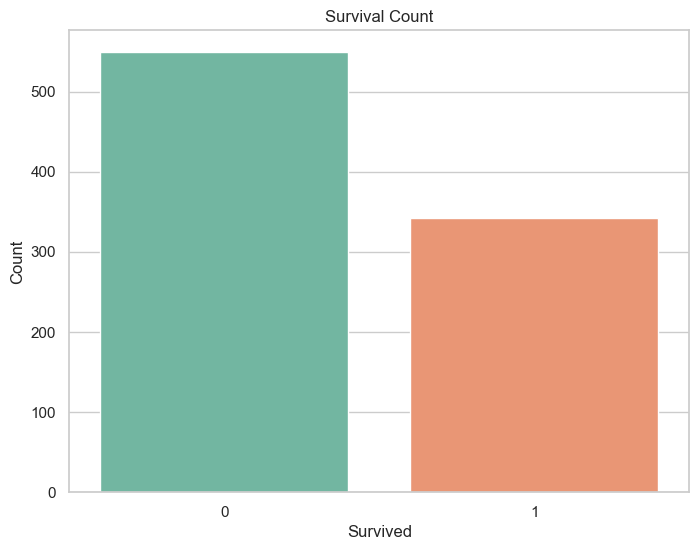

In [16]:
# Create a count plot for Survived column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=titanic_data, palette="Set2")
ax.set_title('Survival Count')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')


In [17]:
# Display the plot
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9288\1799509061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex', data=titanic_data, palette="Set2")


Text(0, 0.5, 'Count')

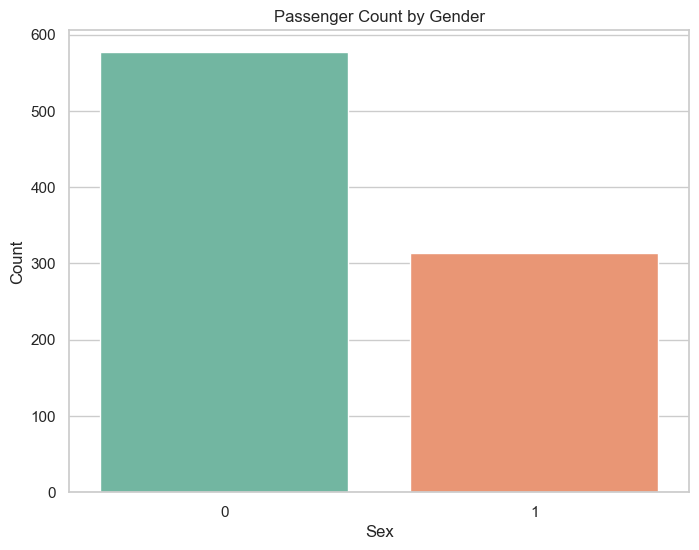

In [18]:
# Create a count plot for Sex column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', data=titanic_data, palette="Set2")
ax.set_title('Passenger Count by Gender')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

In [19]:
# Display the plot
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9288\3549370176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data=titanic_data, palette="Set2")


Text(0, 0.5, 'Count')

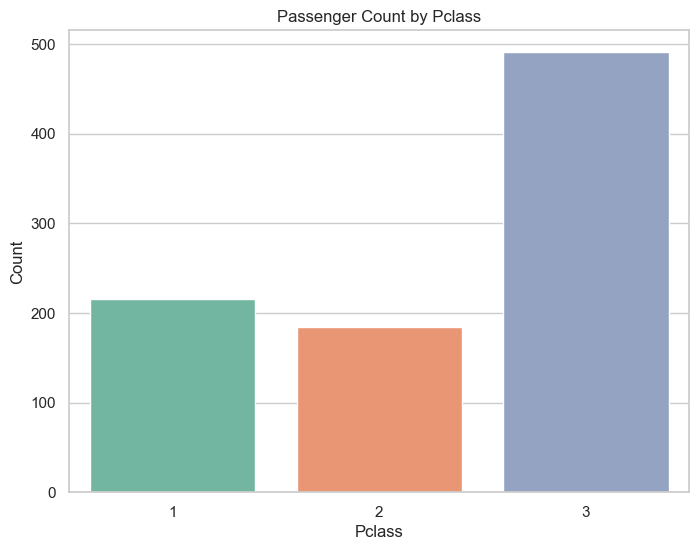

In [20]:
# Create a count plot for Pclass column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Pclass', data=titanic_data, palette="Set2")
ax.set_title('Passenger Count by Pclass')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')

In [22]:
# Display the plot
plt.show()